In [3]:
import pandas as pd
import numpy as np
import math
from os.path import join
from collections import defaultdict
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import MaxNLocator
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [49]:
def boxplot(data, table, filename):
    d = []
    label = []
    for k in data:
        d.append(data[k])
        label.append(table[k])
    fig, ax = plt.subplots()
    boxplot_dict = ax.boxplot(d)
    plt.xticks([x+1 for x in range(len(d))] , label)
    
    color_dict = {'A':'orange', 'B':'blue', 'C':'green', 'D': 'yellow', 'E': 'RED'}
    i=0
    for b in boxplot_dict['boxes']:
        lab = ax.get_xticklabels()[i].get_text()
        print("Label property of box {0} is {1}".format(i, lab))
        b.set_color(color_dict[lab])
        for k in data:
            if table[k] == lab:
                b.set_label("{0}: {1}".format(lab, k))
        i += 1
    plt.ylabel("実行時間（sec）")
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
    fig.savefig(join("/Users/hashmup/Dropbox/研究室/卒業論文/thesis/images", filename))
    plt.show()

Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C
Label property of box 3 is D
Label property of box 4 is E


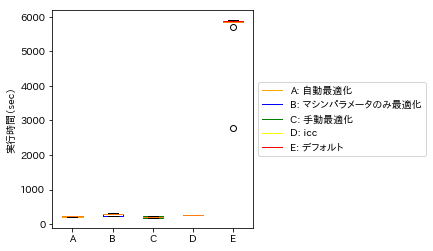

Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is C
Label property of box 3 is D


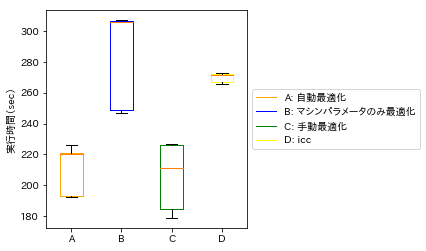

In [56]:
df_cluster = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
    "デフォルト": [2769.389279, 5860.954495, 5841.403846, 5860.959548, 5850.891501, 5884.45570, 5882.077237, 5902.260200, 5899.499978, 5694.459678],
}
table = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "デフォルト": "E",
    "icc": "D"
}
boxplot(df_cluster, table, "cluster-compare.pdf")
df_cluster2 = {
    "自動最適化": [220.992026, 192.518224, 194.101569, 220.950808, 220.335424, 225.530369, 192.859105, 225.757215, 220.190401, 193.026961],
    "マシンパラメータのみ最適化": [306.157610, 306.413272, 247.838257, 306.945893, 306.132023, 246.600985, 247.733106, 305.482598, 306.259903, 251.214914],
    "手動最適化": [226.011645, 226.855698, 178.792345, 179.301381, 225.616986, 225.840626, 197.147325, 180.120307, 224.526922, 196.936687],
    "icc": [266.276054, 267.938918, 265.444528, 265.809020, 271.246538, 271.793423, 271.584290, 272.576730, 271.736764, 272.912230],
}
table2 = {
    "自動最適化": "A",
    "マシンパラメータのみ最適化": "B",
    "手動最適化": "C",
    "icc": "D"
}
boxplot(df_cluster2, table2, "cluster-compare-2.pdf")

Label property of box 0 is A
Label property of box 1 is B
Label property of box 2 is E
Label property of box 3 is C


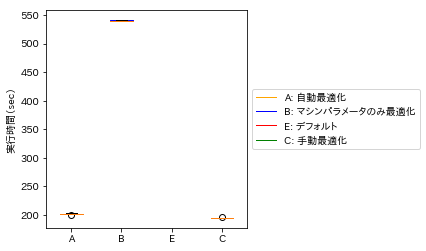

Label property of box 0 is A
Label property of box 1 is B


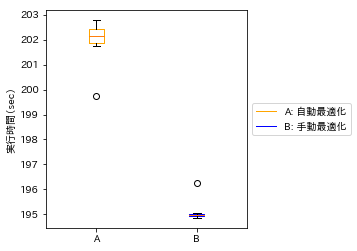

In [57]:
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "マシンパラメータのみ最適化": [540.314667, 540.195012, 540.236031, 540.566031, 540.155487, 540.235561, 539.998205, 540.286428, 540.843942, 540.834667],
    "デフォルト": [],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table, "k-compare.pdf")

table3 = {
    "自動最適化": "A",
    "手動最適化": "B",
}
df_k = {
    "自動最適化": [202.158979 ,202.775673, 199.756990, 201.858775, 202.281723, 202.130959, 202.471293, 202.411957, 201.727052],
    "手動最適化": [194.901470, 196.241227, 194.939445, 195.043659, 195.016793, 195.008183, 194.926891, 194.858799, 194.967911, 195.023119],
}
boxplot(df_k, table3, "k-compare-2.pdf")

In [ ]:
# クラスタ
# 自動最適化
df_autotune = pd.read_csv("cluster/data/2018-01-31_12-11/result_candidate.csv")

# マシンパラメータチューニング済み
df_default_machinepar = pd.read_csv("cluster/data/2018-01-31_13-33/result_candidate.csv")

# デフォルト
df_default = pd.read_csv("cluster/data/2018-01-31_13-33/result_candidate.csv")

# icc
df_default_icc = pd.read_csv("cluster/data/2018-01-31_13-33/result_candidate.csv")

# miyamoto
df_miyamoto = pd.read_csv("cluster/data/2018-01-31_13-33/result_candidate.csv")

# 自動最適化 icc





In [ ]:
# 京
# 自動最適化
df_autotune = pd.read_csv("k/data/2018-01-31_12-11/result_candidate.csv")

# マシンパラメータチューニング済み
df_default_machinepar = pd.read_csv("k/data/2018-01-31_13-33/result_candidate.csv")

# デフォルト
df_default = pd.read_csv("k/data/2018-01-31_13-33/result_candidate.csv")

# miyamoto
df_miyamoto = pd.read_csv("k/data/2018-01-31_13-33/result_candidate.csv")





In [ ]:
df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_candidate.csv")
df_50['time_avg'] = (df_50['time'] + df_50['time0'] + df_50['time1'] + df_50['time2'] + df_50['time3'] + df_50['time4']) / 6.0
df_50 = df_50.sort_values(by=["time_avg"]).reset_index(drop=True)
df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_candidate.csv")
df_100['time_avg'] = (df_100['time'] + df_100['time0'] + df_100['time1'] + df_100['time2'] + df_100['time3'] + df_100['time4']) / 6.0
df_100 = df_100.sort_values(by="time_avg").reset_index(drop=True)
df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_candidate.csv")
df_250['time_avg'] = (df_250['time'] + df_250['time0'] + df_250['time1'] + df_250['time2'] + df_250['time3'] + df_250['time4']) / 6.0
df_250 = df_250.sort_values(by="time_avg").reset_index(drop=True)
df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_candidate.csv")
df_500['time_avg'] = (df_500['time'] + df_500['time0'] + df_500['time1'] + df_500['time2'] + df_500['time3'] + df_500['time4']) / 6.0
df_500 = df_500.sort_values(by="time_avg").reset_index(drop=True)
gen_graph({"シミュレーション時間 50": df_50, "シミュレーション時間 100": df_100, "シミュレーション時間 250": df_250, "シミュレーション時間 500": df_500}, "cluster")

In [ ]:
df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_candidate.csv")
df_50['time_avg'] = (df_50['time'] + df_50['time0'] + df_50['time1'] + df_50['time2'] + df_50['time3'] + df_50['time4']) / 6.0
df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_candidate.csv")
df_100['time_avg'] = (df_100['time'] + df_100['time0'] + df_100['time1'] + df_100['time2'] + df_100['time3'] + df_100['time4']) / 6.0
df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_candidate.csv")
df_250['time_avg'] = (df_250['time'] + df_250['time0'] + df_250['time1'] + df_250['time2'] + df_250['time3'] + df_250['time4']) / 6.0
df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_candidate.csv")
df_500['time_avg'] = (df_500['time'] + df_500['time0'] + df_500['time1'] + df_500['time2'] + df_500['time3'] + df_500['time4']) / 6.0
df_50 = df_50.sort_values(by=["time_avg"]).reset_index(drop=True)[:50]
df_100 = df_100.sort_values(by="time_avg").reset_index(drop=True)[:50]
df_250 = df_250.sort_values(by="time_avg").reset_index(drop=True)[:50]
df_500 = df_500.sort_values(by="time_avg").reset_index(drop=True)[:50]
gen_graph({"シミュレーション時間 50": df_50, "シミュレーション時間 100": df_100, "シミュレーション時間 250": df_250, "シミュレーション時間 500": df_500}, "cl

In [ ]:
df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_candidate.csv")
df_50['time_avg'] = (df_50['time'] + df_50['time0'] + df_50['time1'] + df_50['time2'] + df_50['time3'] + df_50['time4']) / 6.0
df_50 = df_50.sort_values(by=["time_avg"]).reset_index(drop=True)
df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_candidate.csv")
df_100['time_avg'] = (df_100['time'] + df_100['time0'] + df_100['time1'] + df_100['time2'] + df_100['time3'] + df_100['time4']) / 6.0
df_100 = df_100.sort_values(by="time_avg").reset_index(drop=True)
df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_candidate.csv")
df_250['time_avg'] = (df_250['time'] + df_250['time0'] + df_250['time1'] + df_250['time2'] + df_250['time3'] + df_250['time4']) / 6.0
df_250 = df_250.sort_values(by="time_avg").reset_index(drop=True)
df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_candidate.csv")
df_500['time_avg'] = (df_500['time'] + df_500['time0'] + df_500['time1'] + df_500['time2'] + df_500['time3'] + df_500['time4']) / 6.0
df_500 = df_500.sort_values(by="time_avg").reset_index(drop=True)
gen_diff_graph({"stoptime 50": df_50, "stoptime 100": df_100, "stoptime 250": df_250, "stoptime 500": df_500}, "cluster-diff")

In [ ]:
df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_candidate.csv")
df_50['time_avg'] = (df_50['time'] + df_50['time0'] + df_50['time1'] + df_50['time2'] + df_50['time3'] + df_50['time4']) / 6.0
df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_candidate.csv")
df_100['time_avg'] = (df_100['time'] + df_100['time0'] + df_100['time1'] + df_100['time2'] + df_100['time3'] + df_100['time4']) / 6.0
df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_candidate.csv")
df_250['time_avg'] = (df_250['time'] + df_250['time0'] + df_250['time1'] + df_250['time2'] + df_250['time3'] + df_250['time4']) / 6.0
df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_candidate.csv")
df_500['time_avg'] = (df_500['time'] + df_500['time0'] + df_500['time1'] + df_500['time2'] + df_500['time3'] + df_500['time4']) / 6.0
df_50 = df_50.sort_values(by=["time_avg"]).reset_index(drop=True)[:20]
df_100 = df_100.sort_values(by="time_avg").reset_index(drop=True)[:20]
df_250 = df_250.sort_values(by="time_avg").reset_index(drop=True)[:20]
df_500 = df_500.sort_values(by="time_avg").reset_index(drop=True)[:20]
gen_diff_graph({"stoptime 50": df_50, "stoptime 100": df_100, "stoptime 250": df_250, "stoptime 500": df_500}, "cluster-diff-top20")

In [ ]:
# df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_all.csv")
# df_50 = df_50.sort_values(by="time").reset_index(drop=True)
# gen_4graph(df_50, "cluster-50.pdf")

In [ ]:
# df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_all.csv")
# df_100 = df_100.sort_values(by="time").reset_index(drop=True)
# gen_4graph(df_100, "cluster-100.pdf")

In [ ]:
# df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_all.csv")
# df_250 = df_250.sort_values(by="time").reset_index(drop=True)
# gen_4graph(df_250, "cluster-250.pdf")

In [ ]:
# df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_all.csv")
# df_500 = df_500.sort_values(by="time").reset_index(drop=True)
# gen_4graph(df_500, "cluster-500.pdf")

In [ ]:
# df_50 = pd.read_csv("cluster/data/2018-01-29_23-05/result_candidate.csv")
# df_50['time_avg'] = (df_50['time'] + df_50['time0'] + df_50['time1'] + df_50['time2'] + df_50['time3'] + df_50['time4']) / 6.0
# df_50 = df_50.sort_values(by="time_avg").reset_index(drop=True)
# gen_4graph(df_50, "cluster-50.pdf", True)

In [ ]:
# df_100 = pd.read_csv("cluster/data/2018-01-28_20-16/result_candidate.csv")
# df_100['time_avg'] = (df_100['time'] + df_100['time0'] + df_100['time1'] + df_100['time2'] + df_100['time3'] + df_100['time4']) / 6.0
# df_100 = df_100.sort_values(by="time_avg").reset_index(drop=True)
# gen_4graph(df_100, "cluster-100.pdf", True)

In [ ]:
# df_250 = pd.read_csv("cluster/data/2018-01-29_04-47/result_candidate.csv")
# df_250['time_avg'] = (df_250['time'] + df_250['time0'] + df_250['time1'] + df_250['time2'] + df_250['time3'] + df_250['time4']) / 6.0
# df_250 = df_250.sort_values(by="time_avg").reset_index(drop=True)
# gen_4graph(df_250, "cluster-250.pdf", True)

In [ ]:
# df_500 = pd.read_csv("cluster/data/2018-01-29_20-46/result_candidate.csv")
# df_500['time_avg'] = (df_500['time'] + df_500['time0'] + df_500['time1'] + df_500['time2'] + df_500['time3'] + df_500['time4']) / 6.0
# df_500 = df_500.sort_values(by="time_avg").reset_index(drop=True)
# gen_4graph(df_500, "cluster-500.pdf", True)